In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

offline importation

In [ ]:
data_train=pd.read_csv('/content/MNIST_train.csv')
data_test=pd.read_csv('/content/MNIST_test.csv')

In [ ]:
data_train.head(10)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


In [ ]:
sample_train=np.random.randint(8000,size=4000)
sample_test=np.random.randint(6000,size=1000)

In [ ]:
d_train_sample=data_train.values[sample_train]
d_test_sample=data_test.values[sample_test]

In [ ]:
print(d_train_sample.shape)
print(d_test_sample.shape)

(4000, 785)
(1000, 785)


**Data splitting**

In [ ]:
x_train=d_train_sample[:,1:785]
x_train.shape

(4000, 784)

In [ ]:
y_train=d_train_sample[:,0:1]
y_train.shape

(4000, 1)

In [ ]:
x_test = d_test_sample[:,1:785]
x_test.shape

(1000, 784)

In [ ]:
y_test = d_test_sample[:,0:1]
y_test.shape

(1000, 1)

DATA NORMALIZATION

In [ ]:
from sklearn.preprocessing import MinMaxScaler 
scaller=MinMaxScaler()

In [ ]:
scaller.fit(x_train)
x_train=scaller.transform(x_train)
scaller.fit(x_test)
x_test=scaller.transform(x_test)

In [ ]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

MODEL TRAINING

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train.ravel()) # ravel()used to convert an array to 1D array

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.score(x_test,y_test.ravel())

0.883

choosing the parameter K

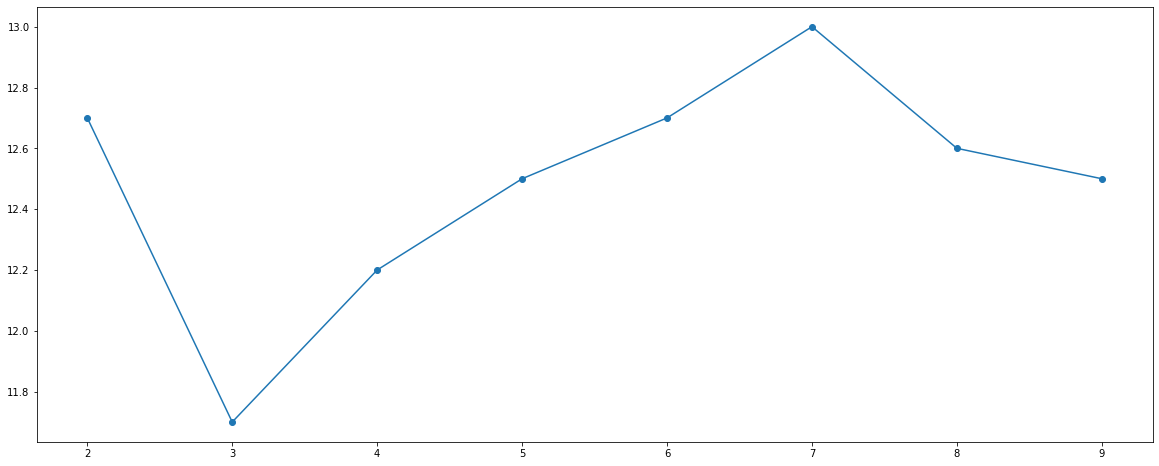

In [ ]:
error= []
for k in range(2,10):
    knn = KNeighborsClassifier(k)
    score=knn.fit(x_train,y_train.ravel()).score(x_test,y_test.ravel())
    error.append(100*(1-score))
plt.figure(figsize=(20,8))
plt.plot(range(2,10),error, 'o-') 
plt.show()

finding the lowest error

In [ ]:
min=error[0]
index=0
for i in range(1,len(error)):
  if min>error[i]:
    min=error[i]
    index=i
print(f"The minimum value is: {min}")
print(f"The k value is: {index+2}") # k=index+2 because i=[0,..7] and K from[2,9]

The minimum value is: 11.7
The k value is: 3


**Prediction**

In [ ]:
knn=KNeighborsClassifier(4)
knn.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [ ]:
knn.score(x_test,y_test)

0.878

In [ ]:
predicted=knn.predict(x_test)
predicted.shape
print(predicted)

[1 7 4 0 2 7 9 1 5 4 3 5 2 7 5 2 8 2 0 1 1 9 9 1 6 6 3 6 1 9 9 4 8 9 3 0 2
 7 4 1 1 1 3 0 1 1 3 0 4 1 8 2 5 6 9 9 0 7 1 0 0 2 7 1 4 9 8 7 0 2 7 1 9 3
 4 2 1 3 7 7 5 5 4 9 6 3 6 3 8 0 9 0 3 1 3 2 2 7 2 5 6 3 9 1 1 0 0 4 0 8 2
 9 8 0 0 2 3 7 9 6 8 7 8 5 3 9 9 9 4 2 3 1 7 6 6 9 7 0 3 8 9 1 9 6 7 6 4 6
 5 1 1 2 6 2 6 0 6 2 8 9 7 6 3 5 0 2 0 1 8 4 3 8 9 9 3 8 8 9 9 7 9 6 3 1 9
 2 9 9 4 5 1 8 9 4 1 4 8 3 2 1 5 6 7 5 0 8 1 3 9 8 4 2 9 7 3 9 1 5 7 8 3 3
 9 7 1 0 9 3 1 4 3 1 7 3 4 0 5 9 1 5 2 7 4 7 4 1 3 4 1 8 9 7 2 8 7 3 1 1 4
 3 4 7 3 8 1 7 0 2 0 6 9 3 5 7 2 9 3 5 1 4 3 6 5 7 6 6 6 5 4 0 7 8 5 0 1 6
 1 1 7 5 8 2 3 6 9 8 3 0 0 5 8 8 6 9 5 0 9 9 6 3 1 5 7 0 9 4 6 9 1 7 6 2 1
 3 7 9 7 0 6 8 4 5 3 9 5 9 4 3 2 4 1 6 0 4 7 3 4 7 5 0 8 9 4 3 6 7 9 3 4 3
 1 4 1 9 6 8 9 5 1 3 7 5 3 2 0 6 6 3 1 6 4 4 9 6 6 4 1 1 7 6 3 4 4 5 2 6 7
 0 1 2 3 0 9 5 5 8 6 8 0 0 5 7 6 0 4 4 8 4 8 7 2 7 7 2 0 7 1 9 7 1 7 6 0 5
 0 5 2 8 7 9 5 3 5 1 9 2 1 6 4 4 2 7 7 9 8 8 2 9 4 7 1 1 3 1 0 5 7 9 4 3 7
 3 0 2 4 7 1 8 2 3 0 9 5 

In [ ]:
images = x_test.reshape((-1,28, 28))
images.shape

(1000, 28, 28)

In [ ]:
#choosing 12 images randomly from "images"
selected_img = np.random.randint(images.shape[0], size=12)
selected_img

array([176, 559, 253, 620, 365,  67, 331, 632, 461, 565, 803, 345])

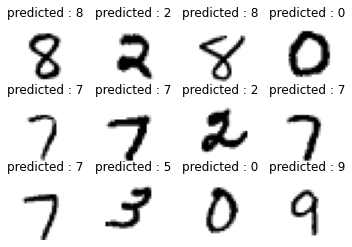

In [ ]:
fig,ax = plt.subplots(3,4)
for index, value in enumerate(selected_img):
  plt.subplot(3,4,index+1)
  plt.axis('off')
  plt.imshow(images[value],cmap=plt.cm.gray_r)
  plt.title('predicted : {}'.format(predicted[value]) )

plt.show()

**CROSS VALIDATION**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
KNN_model=KNeighborsClassifier(n_neighbors=1)
cross_val_score(KNN_model,x_train,y_train.ravel(),cv=5,scoring='accuracy')

array([0.945  , 0.9375 , 0.94875, 0.93625, 0.9475 ])

In [ ]:
KNN_model=KNeighborsClassifier(n_neighbors=2)
cross_val_score(KNN_model,x_train,y_train.ravel(),cv=5,scoring='accuracy')

array([0.9225 , 0.92625, 0.915  , 0.91875, 0.9475 ])

In [ ]:
KNN_model=KNeighborsClassifier(n_neighbors=3)
cross_val_score(KNN_model,x_train,y_train.ravel(),cv=5,scoring='accuracy')

array([0.9175, 0.925 , 0.925 , 0.9225, 0.9525])

**VALIDATION CURVE**

In [ ]:
from sklearn.model_selection import validation_curve

In [ ]:
k=np.arange(2,14)
k

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [ ]:
KNN_model=KNeighborsClassifier()
train_score,val_score=validation_curve(KNN_model,x_train,y_train.ravel(),param_name='n_neighbors',param_range=k,cv=5,scoring='accuracy')

In [ ]:
val_score.mean(axis=1)

array([0.926  , 0.9285 , 0.925  , 0.92425, 0.9225 , 0.9195 , 0.91925,
       0.91825, 0.91625, 0.91825, 0.91525, 0.9165 ])

In [ ]:
val_score.mean(axis=1).argmax()

1

In [ ]:
train_score.mean(axis=1)

array([0.9710625, 0.9681875, 0.9554375, 0.9516875, 0.9459375, 0.942625 ,
       0.940375 , 0.938625 , 0.9341875, 0.934375 , 0.93225  , 0.93075  ])

In [ ]:
train_score.mean(axis=1).argmax()

0

**GRID SEARCH**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={'n_neighbors': np.arange(2,11),'metric':['euclidean','manhattan']}
grid=GridSearchCV(KNN_model,param_grid,cv=5)
grid.fit(x_train,y_train.ravel())

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.9285
{'metric': 'euclidean', 'n_neighbors': 3}


In [ ]:
KNNmodel_best=grid.best_estimator_

In [ ]:
KNNmodel_best.score(x_test,y_test)

0.883

**CONFUSION MATRIX**

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion=confusion_matrix(y_test,KNNmodel_best.predict(x_test))

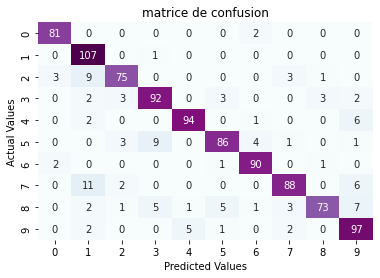

In [ ]:
sns.heatmap(confusion,annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('matrice de confusion')
plt.show()